In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

### Loading dataframe

Data comes from the the online chess platform lichess.com, and contains data from more than 800 000 played games.

In [4]:
df = pd.read_csv("../data/lichess_complete.csv", index_col=0)
df.head(2)

,PGN,Mode,Site,UTCDate,UTCTime,ECO,Opening,TimeControl,Termination Type,wElo,bElo,wWin,bWin,Draw,wPseudo,bPseudo,wRatingDiff,bRatingDiff
0,1. e4 g6 2. d4 Bg7 3. c3 d6 4. Qf3 Nf6 5. h3 O...,Classical,https://lichess.org/Gg06eUOY,2014.07.31,22:00:00,B06,Robatsch (Modern) Defense,420+8,Time forfeit,1407,1669,0,1,0,rima65,aywee,-5,+5
1,1. d4 Nf6 2. c4 g6 3. a3 Bg7 4. Nf3 O-O 5. Nc3...,Blitz,https://lichess.org/bjX4slJM,2014.07.31,22:00:53,E61,Indian Game: West Indian Defense,420+0,Time forfeit,1382,1602,0,1,0,tor48,novatojugad,-5,+5


In [5]:
len(df.index)

843230

### Game modes

There are 4 possible game modes : Blitz, Bullet, Classical and Correspondance.

Blitz refers to a game that has a fast time control (between 5 and 10 minutes).

Bullet is even faster than blitz chess, faster than 3 minutes per player.

Classical chess time control is more than 25 minutes.

Correspondance chess means on lichess that is is a classical chess game, but opening a book is allowed.

In [6]:
df.groupby('Mode').count()['PGN']

Mode
Blitz             372651
Bullet            235828
Classical         232835
Correspondence      1916
Name: PGN, dtype: int64

### Openings

There are 2580 different openings that have been played. The most popular being Van't Kruijs Opening (played 22139 times). On the contrary, there are 198 openings that only have been played once.

In [7]:
len(df.groupby('Opening').count())

2580

In [8]:
df.groupby('Opening').count()['PGN'].sort_values(ascending=False).head(10)

Opening
Van\'t Kruijs Opening                            22139
Modern Defense                                   16975
Horwitz Defense                                  16671
Scandinavian Defense: Mieses-Kotroc Variation    14388
Owen Defense                                     13601
French Defense: Knight Variation                 12588
Sicilian Defense                                 11258
Caro-Kann Defense                                10886
Hungarian Opening                                10791
Queen\'s Pawn Game #2                            10770
Name: PGN, dtype: int64

In [9]:
df.groupby('Opening').count().groupby('PGN').count()['ECO'].head()

PGN
1    198
2    117
3    110
4     66
5     75
Name: ECO, dtype: int64

For the Whites, among the 20 most used opening, the one that won the most is the Scandinavian Defense: Mieses-Kotroc Variation, with a winning rate of 0.57, slightly above average, and the Sicilian Defense seems to be the worst one (0.41 for the Whites).

In [10]:
op_tot = df.groupby('Opening').count()['PGN']

df_op_win = df.groupby(['Opening', 'wWin']).count()['PGN'].sort_values(ascending=False).reset_index()
df_op_win.rename(columns={'PGN':'n_win'}, inplace=True)
df_op_win['Win Rate'] = df_op_win.apply(lambda row : row['n_win'] / op_tot[row['Opening']], axis =1)
df_op_win[df_op_win['wWin'] == 1].head(5)

,Opening,wWin,n_win,Win Rate
1,Van\'t Kruijs Opening,1,9826,0.443832
2,Horwitz Defense,1,9257,0.555276
4,Scandinavian Defense: Mieses-Kotroc Variation,1,8240,0.572699
5,Modern Defense,1,8222,0.484359
7,Owen Defense,1,7013,0.515624


In [11]:
df_op_win[df_op_win['wWin'] == 1].head(20).sort_values(by = 'Win Rate', ascending=False)

,Opening,wWin,n_win,Win Rate
4,Scandinavian Defense: Mieses-Kotroc Variation,1,8240,0.572699
26,French Defense: Normal Variation,1,4509,0.571410
19,Philidor Defense #3,1,5242,0.568670
28,Bishop\'s Opening,1,4305,0.562157
2,Horwitz Defense,1,9257,0.555276
39,Queen\'s Pawn Game: Zukertort Variation,1,3694,0.541008
21,Queen\'s Pawn,1,5154,0.532328
36,Queen\'s Pawn Game: Chigorin Variation,1,3877,0.522648
15,Queen\'s Pawn Game #2,1,5586,0.518663
7,Owen Defense,1,7013,0.515624


### End of the game

The normal way of ending a game is either resignation, checkmate, or stalemate.

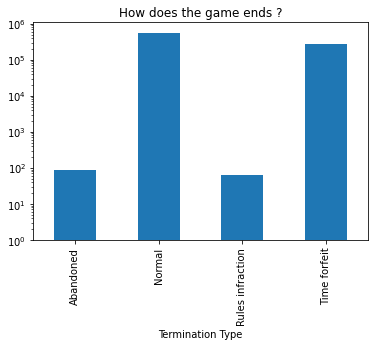

In [13]:
df.groupby('Termination Type')['PGN'].count().plot(kind='bar', title ='How does the game ends ?', log=True);

In [14]:
wWin = len(df[df['wWin'] == 1])
bWin = len(df[df['bWin'] == 1])
draw = len(df[df['Draw'] == 1])

print('The Whites won %s times' % wWin)
print('The Blacks won %s times' % bWin)
print('There was a draw %s times' % draw)

The Whites won 427513 times
The Blacks won 385198 times
There was a draw 30519 times


### Level of players

Their difference

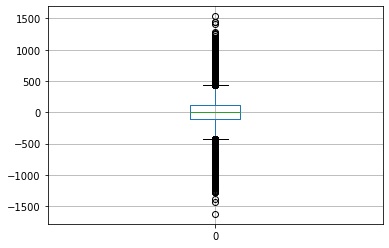

In [17]:
diff = pd.DataFrame(df['wElo'] - df['bElo'])
diff.boxplot();

Their average level

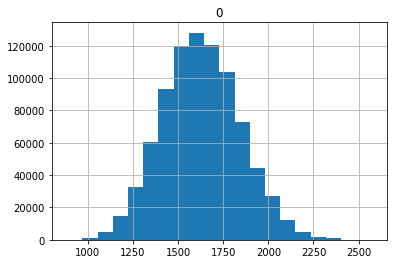

In [18]:
av = pd.DataFrame((df['wElo'] + df['bElo'])/2)
av.hist(bins=20);

### On the games 

Some games are not unique !

In [19]:
print("%s unique games" % len(df["PGN"].unique()))
print("For a total of %s games" % len(df))

830615 unique games
For a total of 843230 games


The longest repeated games are 142 character long, repeated twice, and 

In [20]:
repeated = df[df.duplicated(subset=['PGN'],keep=False)].groupby('PGN').count().reset_index()
repeated['length'] = repeated['PGN'].str.len()
repeated.sort_values('length', ascending=False, inplace=True)
repeated[['PGN', 'Mode', 'length']].rename(columns={'Mode':'n_repeat'}, inplace=False).head(10)

,PGN,n_repeat,length
36,1. Nf3 c5 2. g3 Nc6 3. Bg2 g6 4. O-O Bg7 5. c4...,2,142
941,1. e4 e5 2. Bc4 Nf6 3. Nf3 d6 4. Ng5 Be6 5. Bx...,2,140
1079,1. e4 e5 2. Nf3 Nc6 3. Nc3 Nf6 4. d4 exd4 5. N...,2,138
382,1. d4 d5 2. c4 e6 3. Nf3 Nf6 4. Bg5 c5 5. e3 N...,2,125
1189,1. e4 e5 2. Nf3 f6 3. Nxe5 fxe5 4. Qh5+ Ke7 5....,2,123
1188,1. e4 e5 2. Nf3 f6 3. Nxe5 fxe5 4. Qh5+ Ke7 5....,5,123
1187,1. e4 e5 2. Nf3 f6 3. Nxe5 fxe5 4. Qh5+ Ke7 5....,5,123
1301,1. e4 e5 2. f4 exf4 3. Nf3 Be7 4. Bc4 Bh4+ 5. ...,2,122
1314,1. e4 e5 2. f4 f6 3. fxe5 fxe5 4. Qh5+ Ke7 5. ...,3,122
1375,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Nc6 5. Nf3 Qb...,2,121


### Regression analysis

Can we predict who will win based on the openings, Elo, and mode ?

In [ ]:
mod = smf.ols(formula='wWin ~ C(Mode) + wElo + bElo + C(ECO)', data=df)
res = mod.fit()
res.summary()